In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats

# Feature selection
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

# Classification models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer



## Pima Indians Diabetes Database

El objetivo del conjunto de datos es predecir si un paciente tiene diabetes o no, basándose en ciertas mediciones de diagnóstico incluidas en el conjunto de datos.

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
#convertir un csv en un dataframe
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Feature description

Pregnancies: Número de veces embarazada.

Glucose: Concentración de Glucosa en Plasma a las 2 Horas en una Prueba de Tolerancia Oral a la Glucosa (GTT).

BloodPressure: Presión Arterial Diastólica (mm Hg).

SkinThickness: Grosor del Pliegue Cutáneo del Tríceps (mm).

Insulin: Insulina en Suero a las 2 Horas (µU/ml).

BMI: Índice de Masa Corporal (Peso en kg / (Altura en cm)^2).

DiabetesPedigreeFunction: Función de Pedigrí de Diabetes.

Age: Edad (años).

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


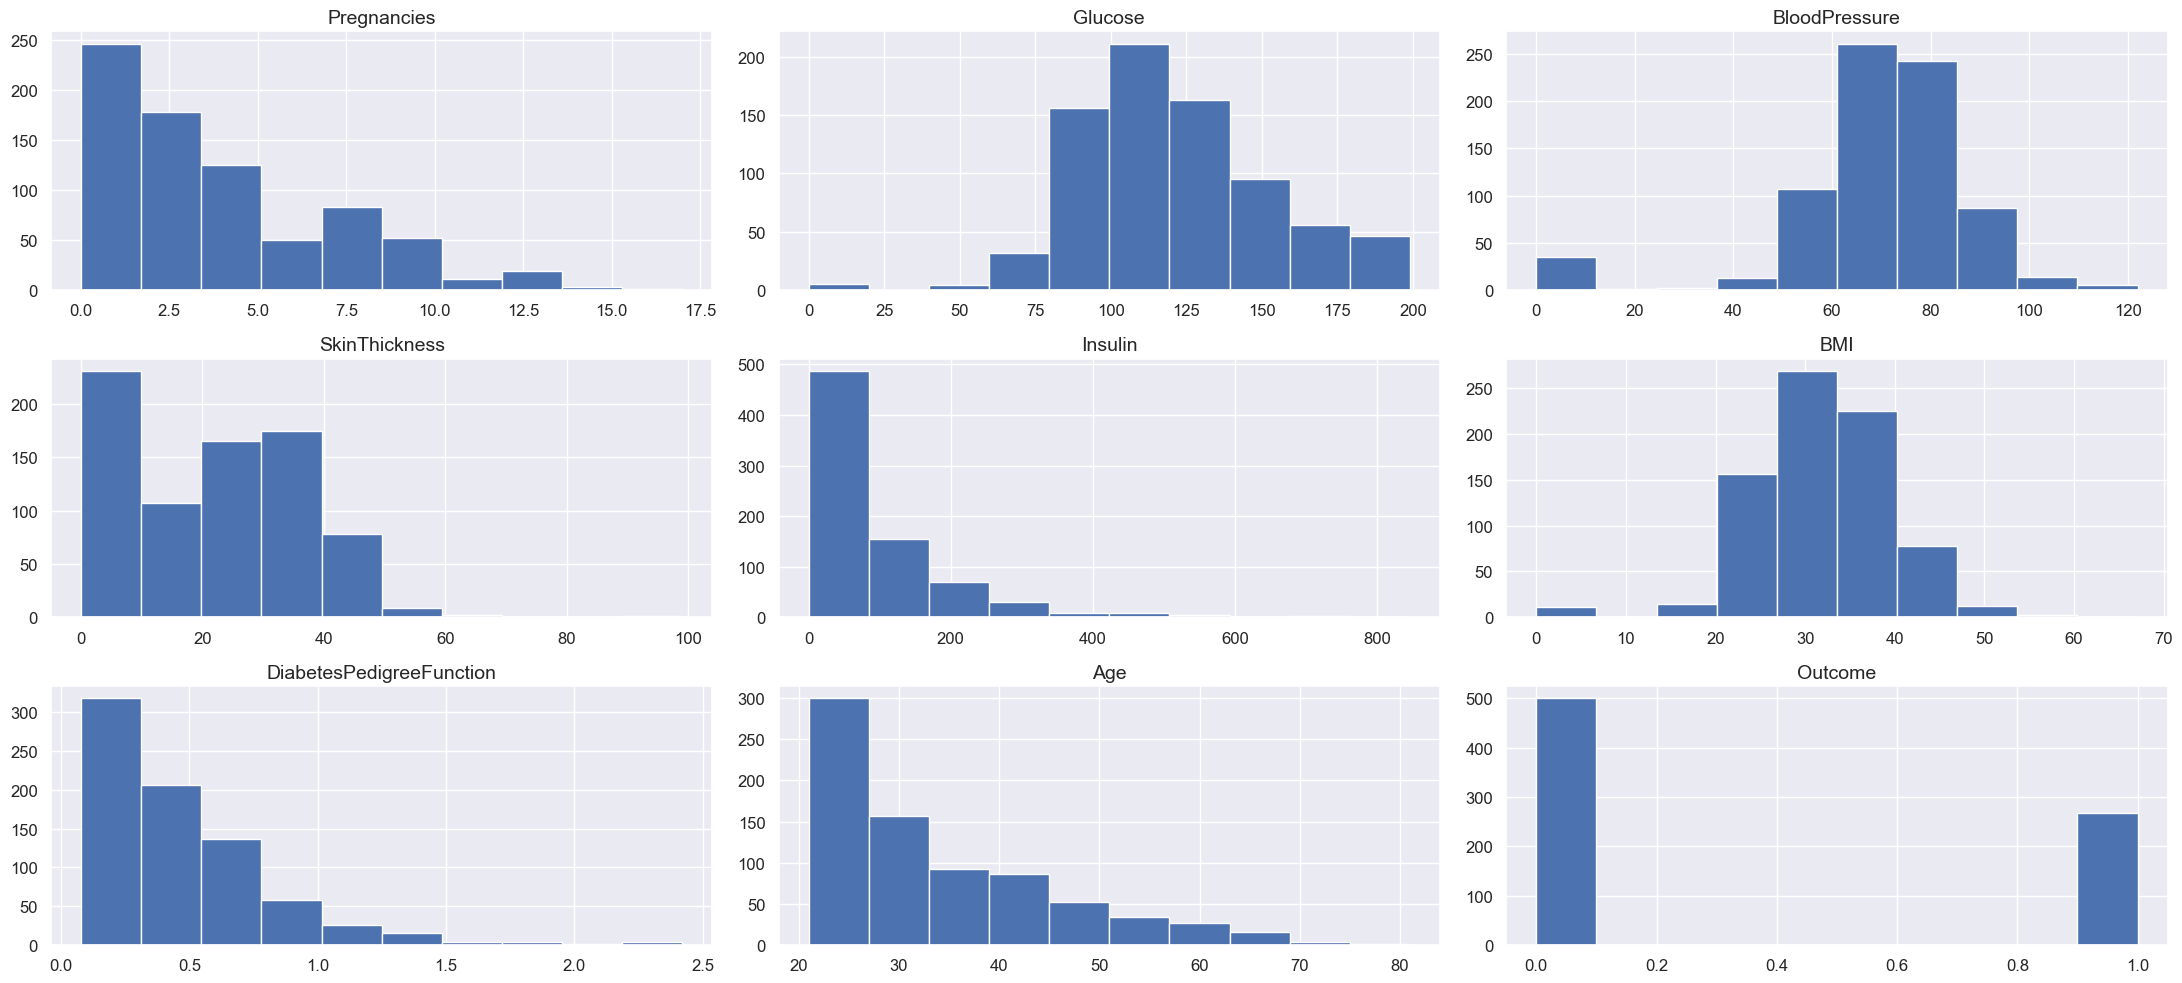

In [6]:
def display_dataset_distributions(dataset,bins=10,figsize=(22,10)):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12 ,figsize=figsize, bins=bins)
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()
    
display_dataset_distributions(df)

<Axes: >

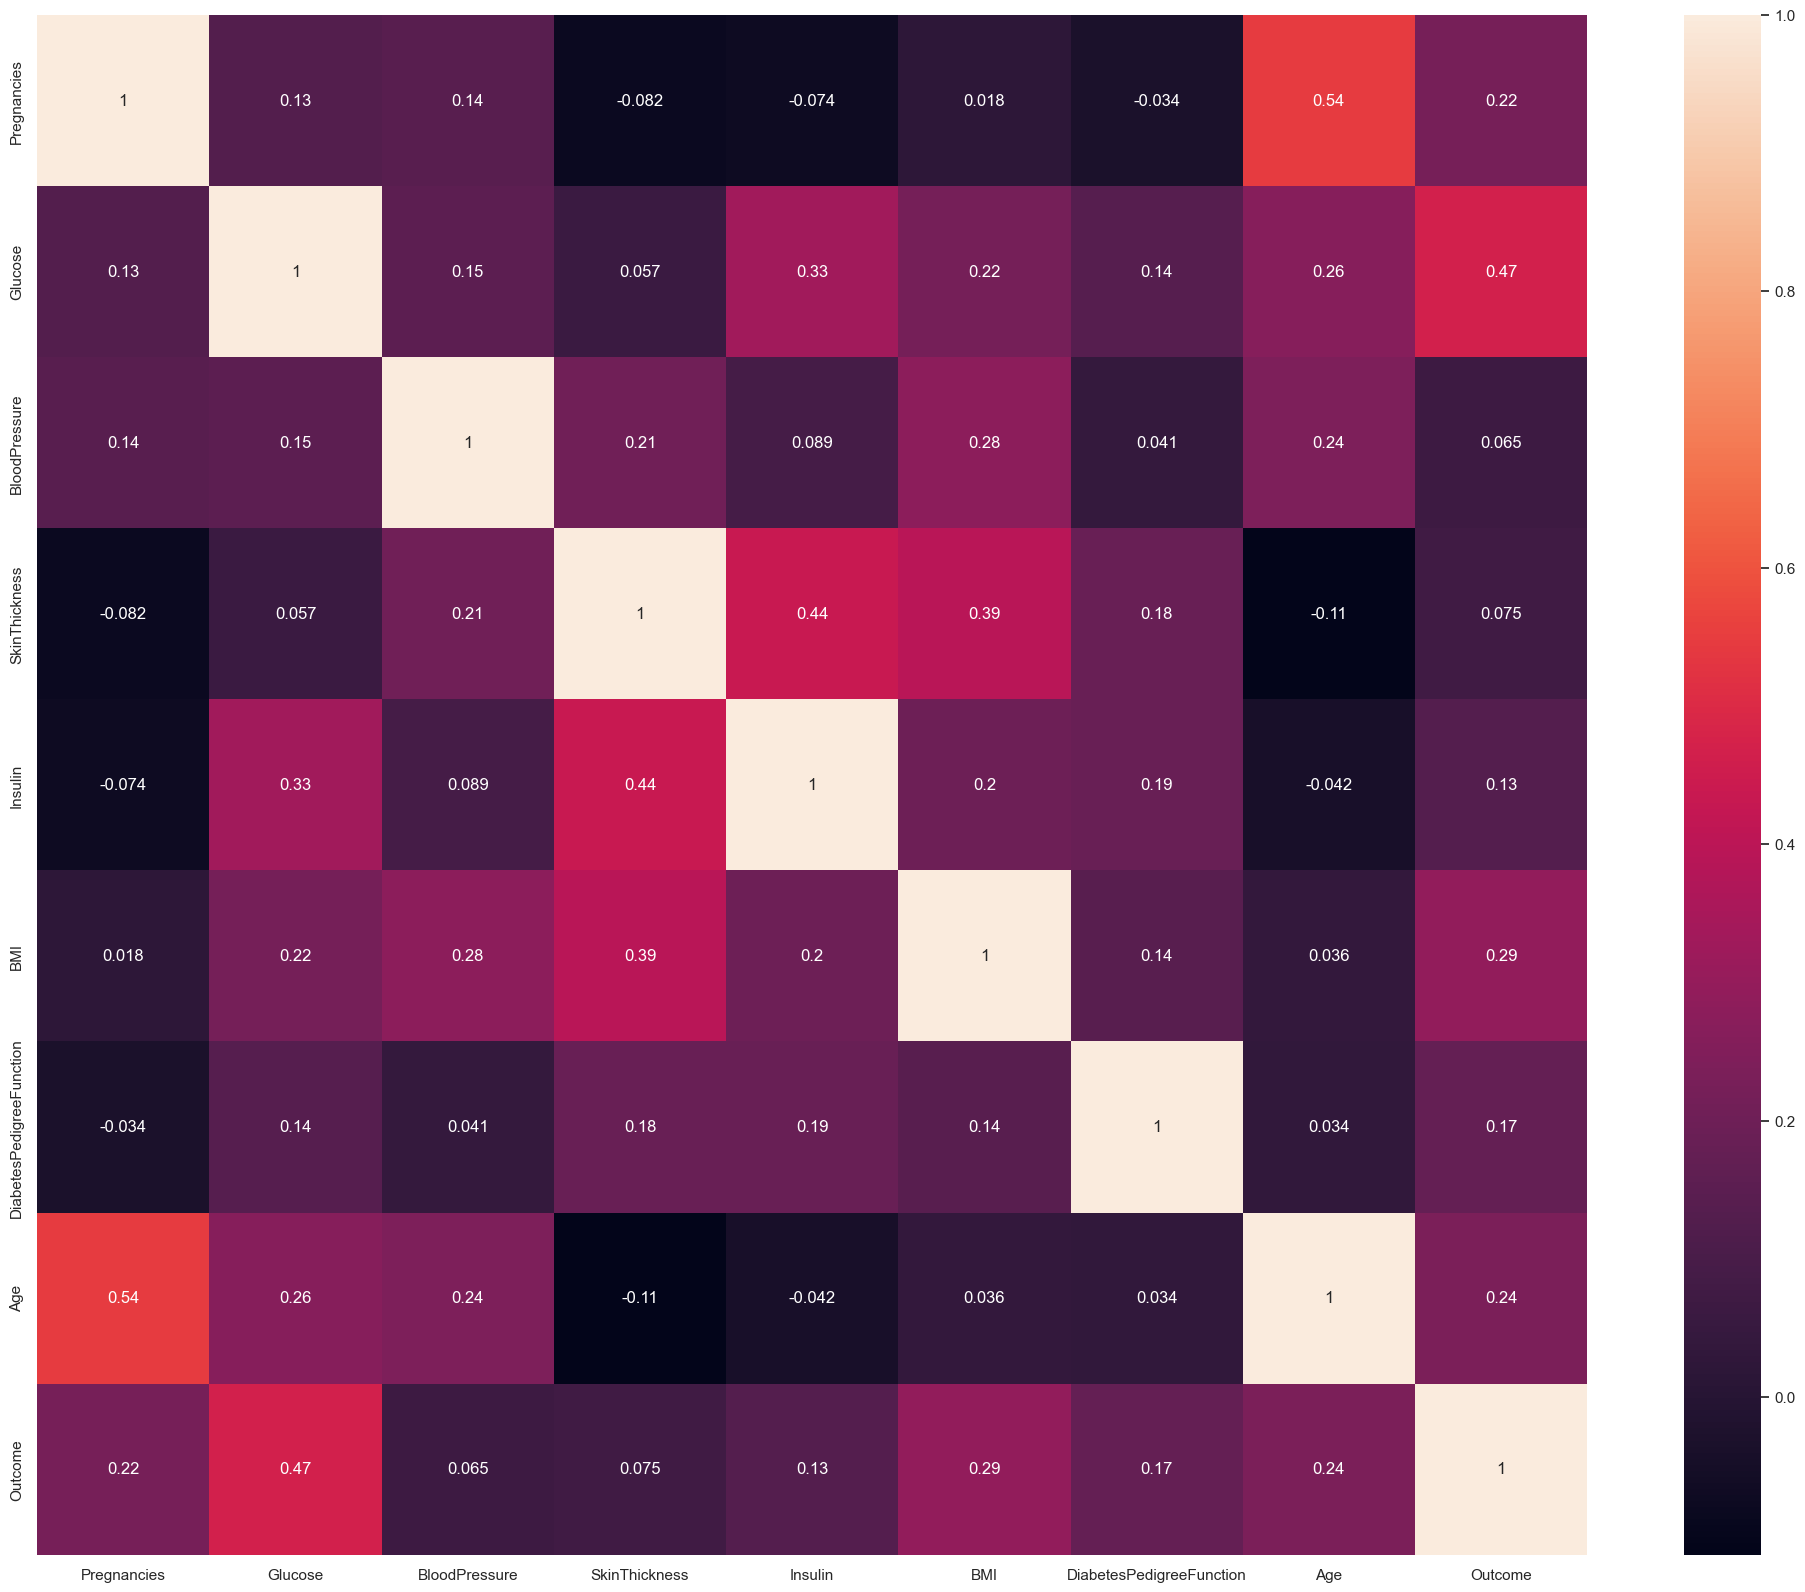

In [7]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True)

In [8]:
# columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# bc = PowerTransformer(method='yeo-johnson')
# df_bc = bc.fit_transform(df[columns])
# df_bc = pd.DataFrame(df_bc)

Outcome
0    500
1    268
Name: count, dtype: int64


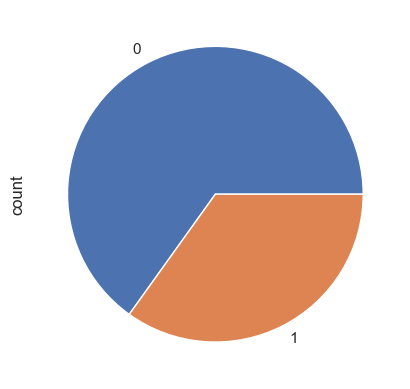

In [9]:
df.Outcome.value_counts().plot(kind ='pie')
print(df.Outcome.value_counts())

Outcome
1    500
0    500
Name: count, dtype: int64


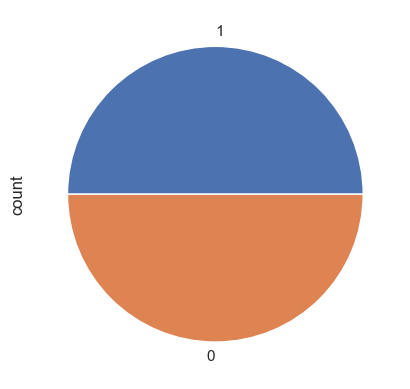

In [10]:
from sklearn.utils import resample
from sklearn.utils import shuffle

df_upsampled = resample(df[df['Outcome']==1], replace = True, 
                            n_samples = df.Outcome.value_counts().max()-df.Outcome.value_counts().min()) 

df = pd.concat([df, df_upsampled]) 
df = shuffle(df)

df.Outcome.value_counts().plot(kind ='pie')
print(df.Outcome.value_counts())

In [11]:
X = df.iloc[:, [3,4]].values
X = X.astype('float64') 

In [12]:
from sklearn.model_selection import train_test_split

df = df[df['Outcome'].notna()]

y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Outcome'], axis=1),
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
    )

print("X_train.shape, X_test.shape = ")
print(X_train.shape, X_test.shape)

print("% of Outcome in original dataset: "+str((df['Outcome']==1).sum()/df.shape[0]*100))
print("% of Outcome in y_train: "+str((y_train==1).sum()/y_train.shape[0]*100))
print("% of Outcome in y_test: "+str((y_test==1).sum()/y_test.shape[0]*100))

X_train.shape, X_test.shape = 
(800, 8) (200, 8)
% of Outcome in original dataset: 50.0
% of Outcome in y_train: 50.0
% of Outcome in y_test: 50.0


In [13]:
# Join it to work easier
X_train['Outcome']=y_train
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
128,1,117,88,24,145,34.5,0.403,40,1
586,8,143,66,0,0,34.9,0.129,41,1
409,1,172,68,49,579,42.4,0.702,28,1
355,9,165,88,0,0,30.4,0.302,49,1
732,2,174,88,37,120,44.5,0.646,24,1
...,...,...,...,...,...,...,...,...,...
328,2,102,86,36,120,45.5,0.127,23,1
9,8,125,96,0,0,0.0,0.232,54,1
766,1,126,60,0,0,30.1,0.349,47,1
160,4,151,90,38,0,29.7,0.294,36,0


C:\Users\cbureu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


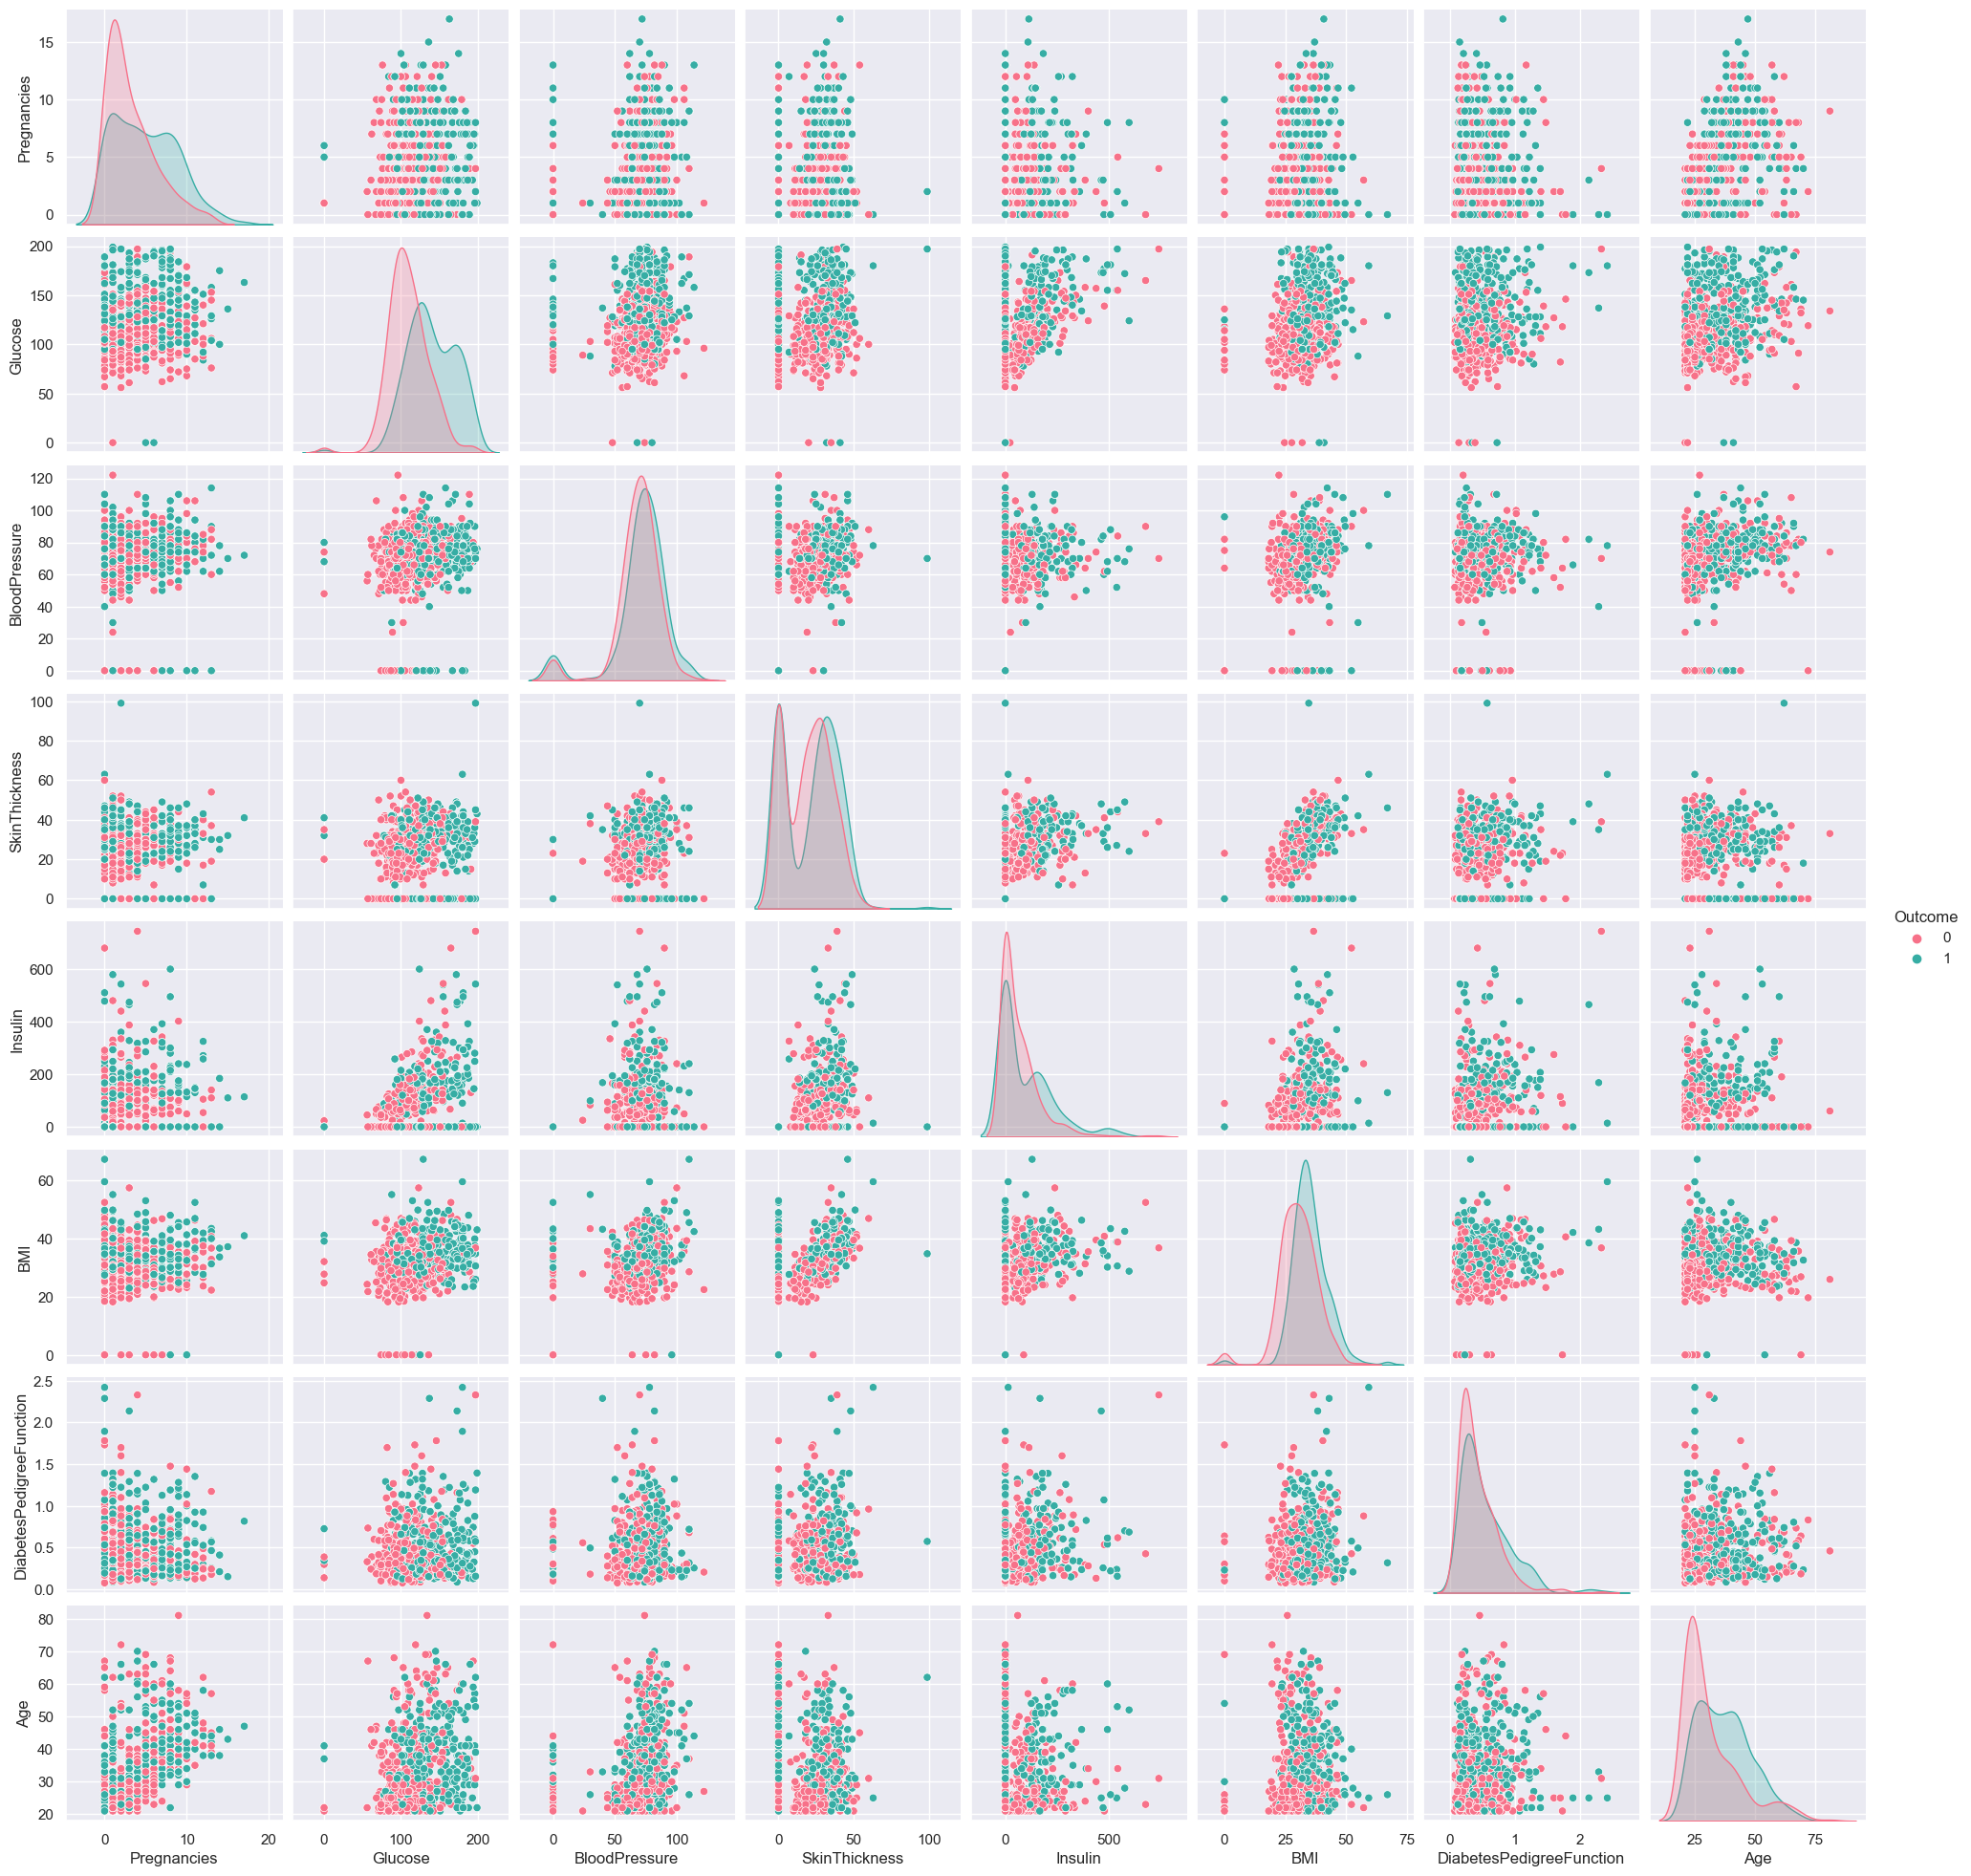

In [14]:
sns.pairplot(X_train,hue="Outcome",palette="husl")

## Outliers

In [15]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    # histograma
    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    # qqplot    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

    fig.suptitle(variable, fontsize=16)

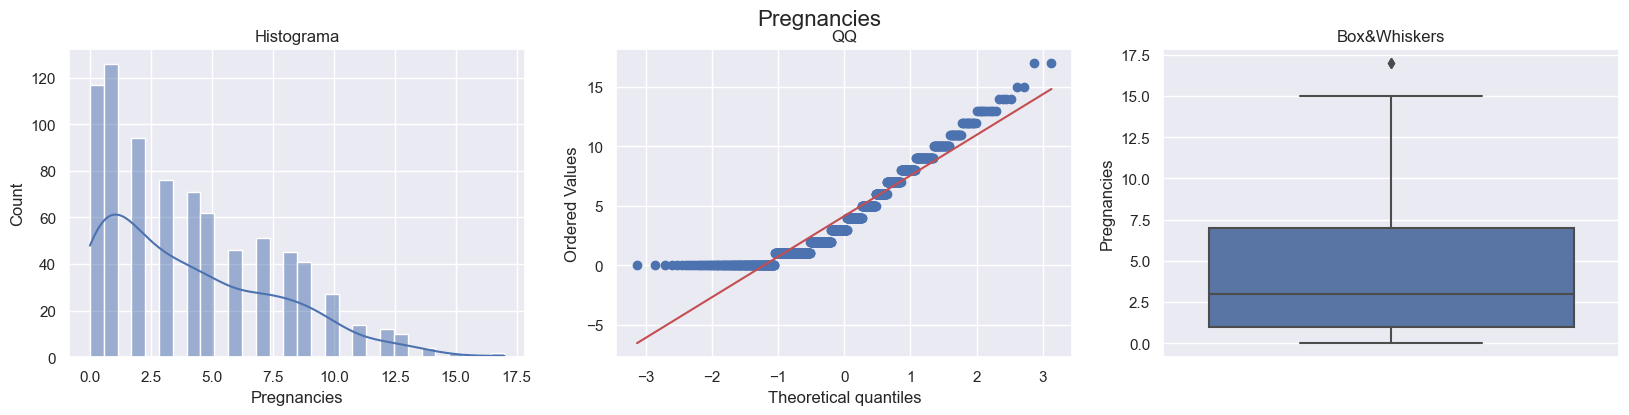

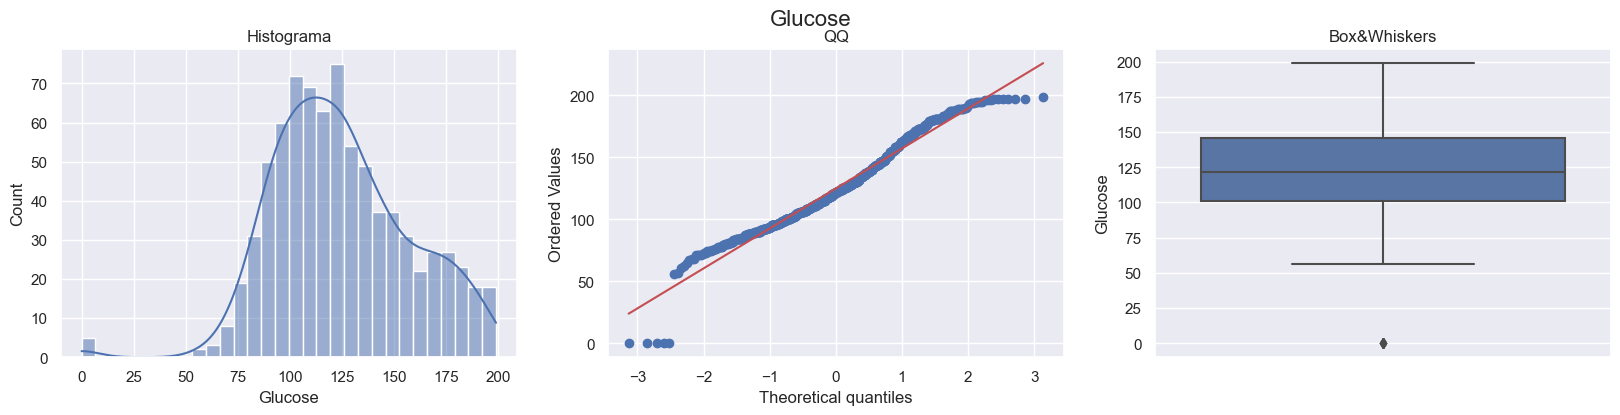

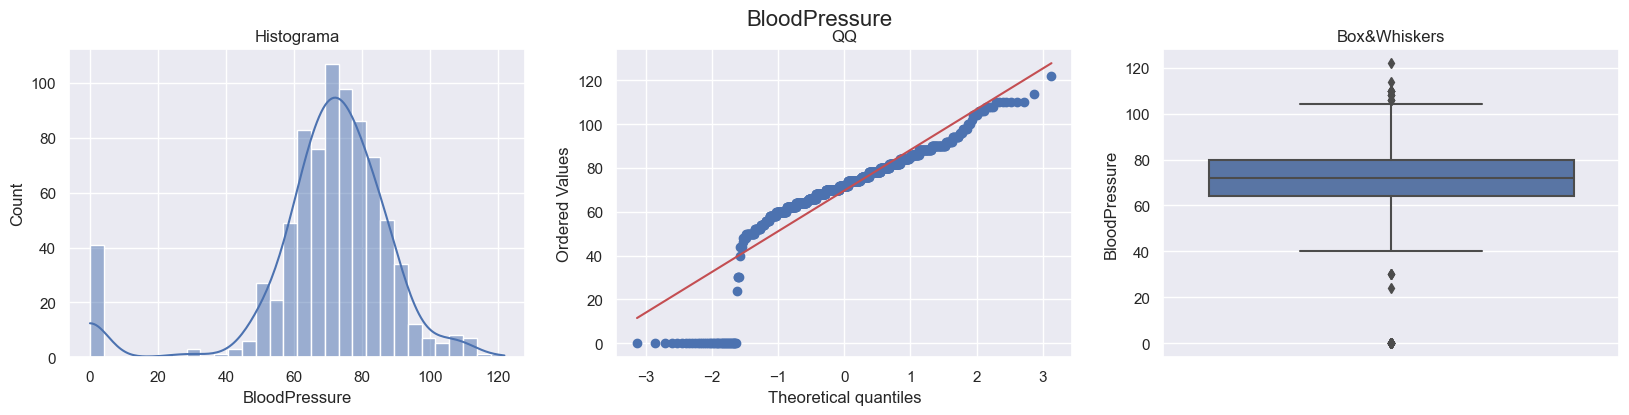

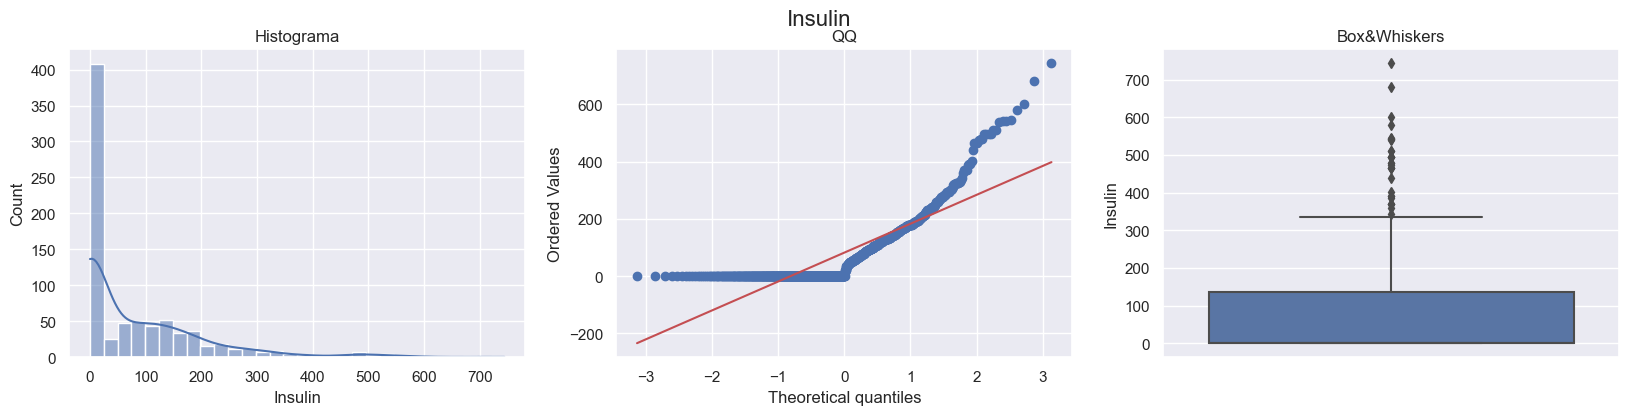

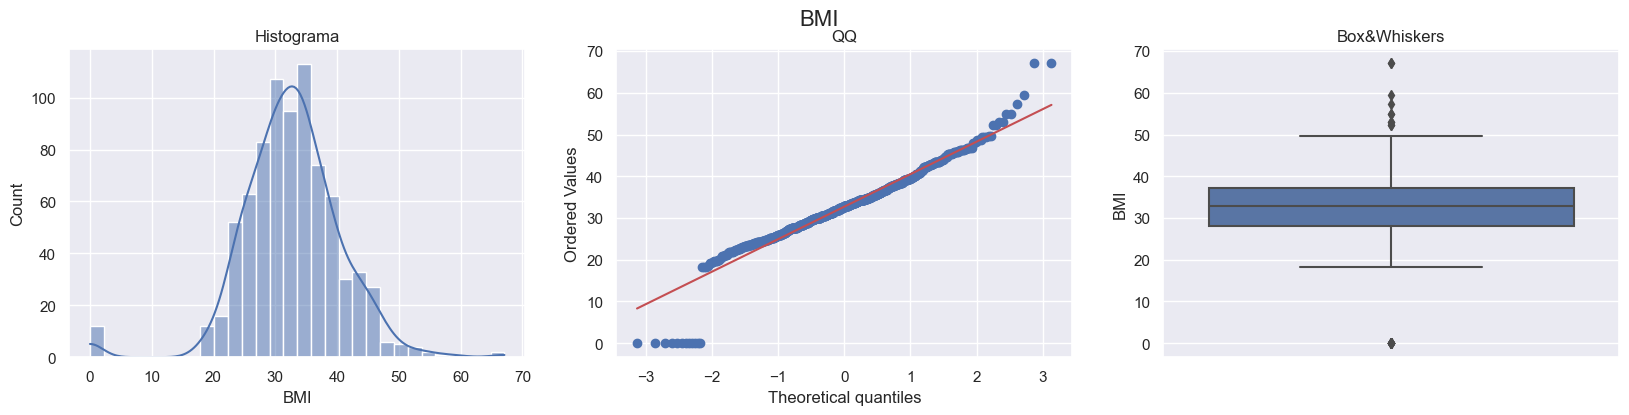

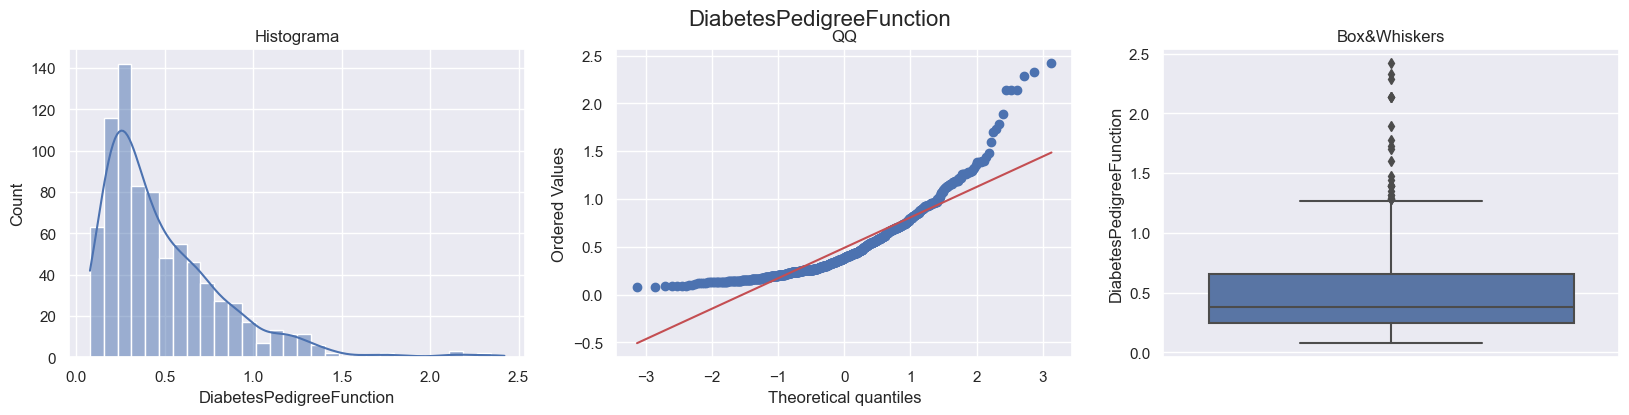

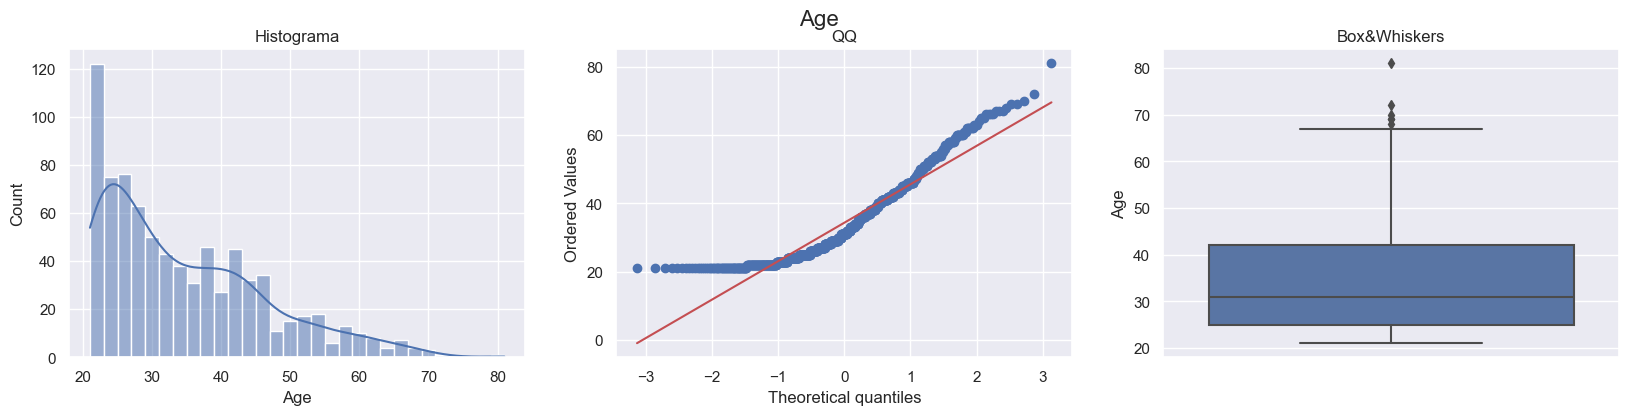

In [16]:
norm_col = [
    'Pregnancies',
    'Glucose', 
    'BloodPressure', 
    'Insulin', 
    'BMI',
    'DiabetesPedigreeFunction', 
    'Age'
]

for col in norm_col:
    outlier_diagnostic_plots(X_train, col)

In [17]:
def find_skewed_boundaries(df, variable, distance=1.5):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary
    
def transform_outliers(df, norm_col, threshold_capped=1.5, threshold_trimmed=1.8, use_manual_limits=False, 
                        upper_limit_trim=0, lower_limit_trim=0, upper_limit_cap=0, lower_limit_cap=0):
    # Trimming and capping outliers
    outliers_total = np.array(np.repeat(False,df.shape[0]))
    X_train_capped = df.copy()
    for col in norm_col:
        
        if use_manual_limits:
            upper_limit, lower_limit = upper_limit_trim, lower_limit_trim
        else:
            upper_limit, lower_limit = find_skewed_boundaries(df, col, threshold_trimmed)

        outliers = np.where(df[col] > upper_limit, True,
                            np.where(df[col] < lower_limit, True, False))                        
        outliers_total = np.logical_or(outliers_total, outliers)
        
        print(str(col) + " outliers = "+str(outliers.sum()))
        
        if use_manual_limits:
            upper_limit, lower_limit = upper_limit_cap, lower_limit_cap
        else:
            upper_limit, lower_limit = find_skewed_boundaries(df, col, threshold_capped)

        X_train_capped[col] = np.where(df[col] > upper_limit, upper_limit,
                            np.where(df[col] < lower_limit, lower_limit, X_train_capped[col]))

    print("Total outliers = "+str(outliers_total.sum()))
    X_train_trimmed = X_train_capped.loc[~(outliers_total)]

    return X_train_trimmed

Pregnancies outliers = 0
Glucose outliers = 5
BloodPressure outliers = 54
Insulin outliers = 25
BMI outliers = 18
DiabetesPedigreeFunction outliers = 13
Age outliers = 1
Total outliers = 98


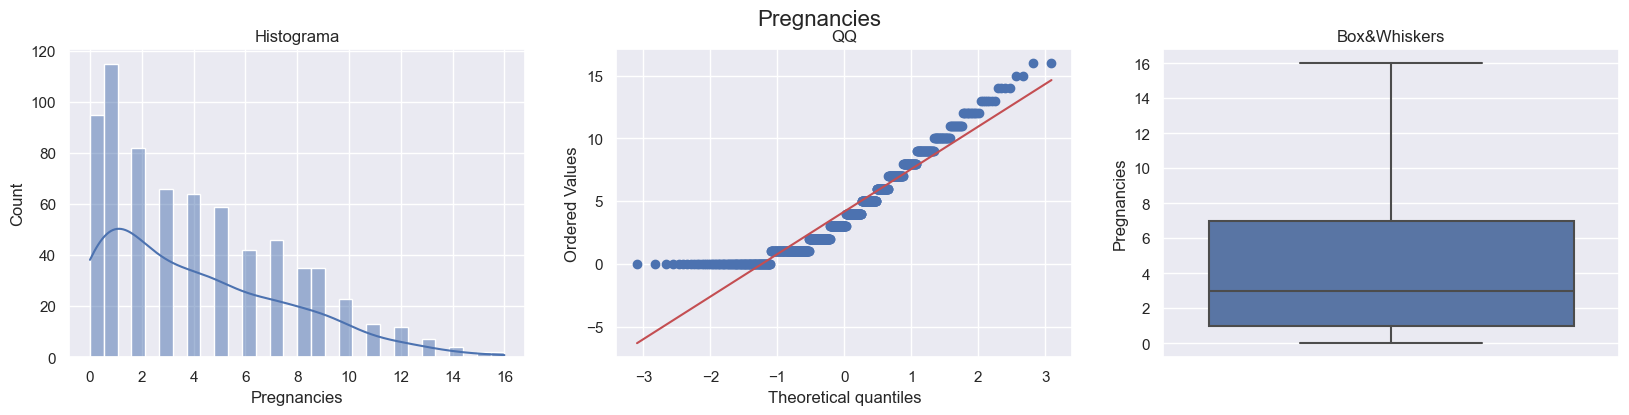

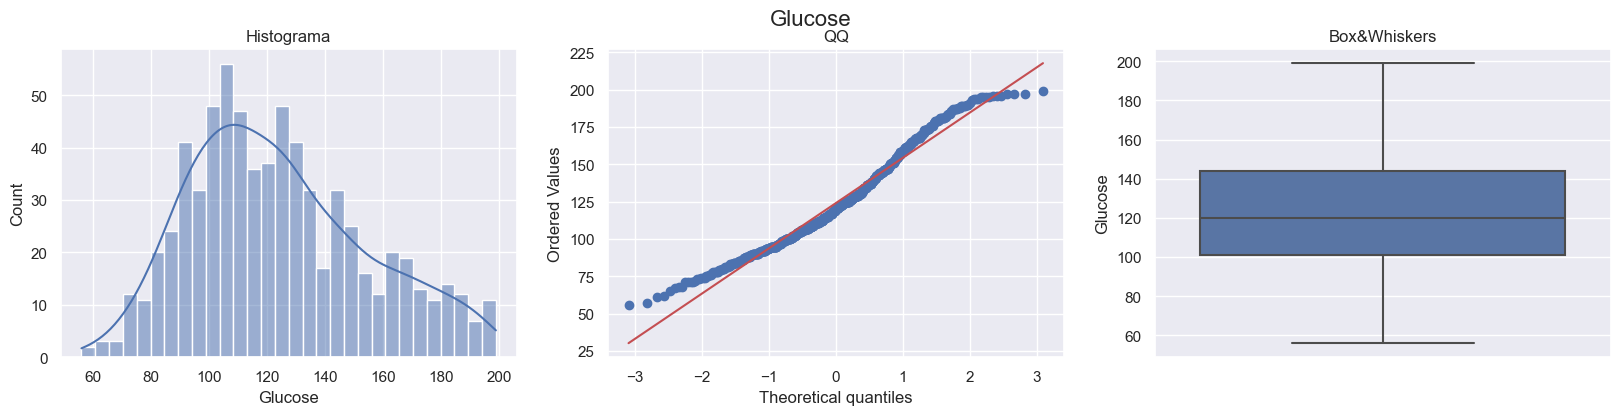

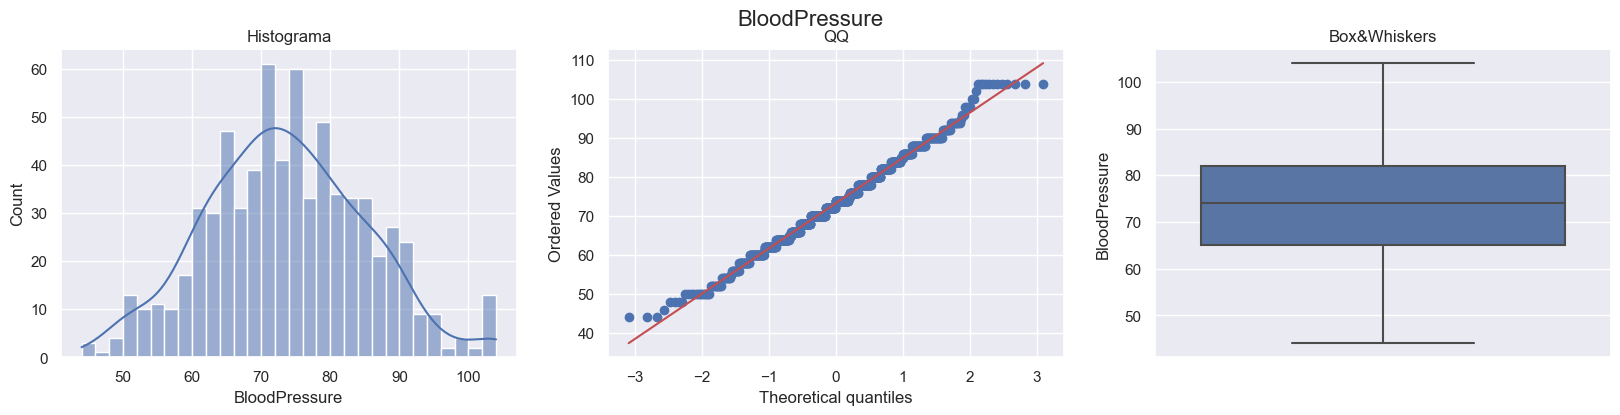

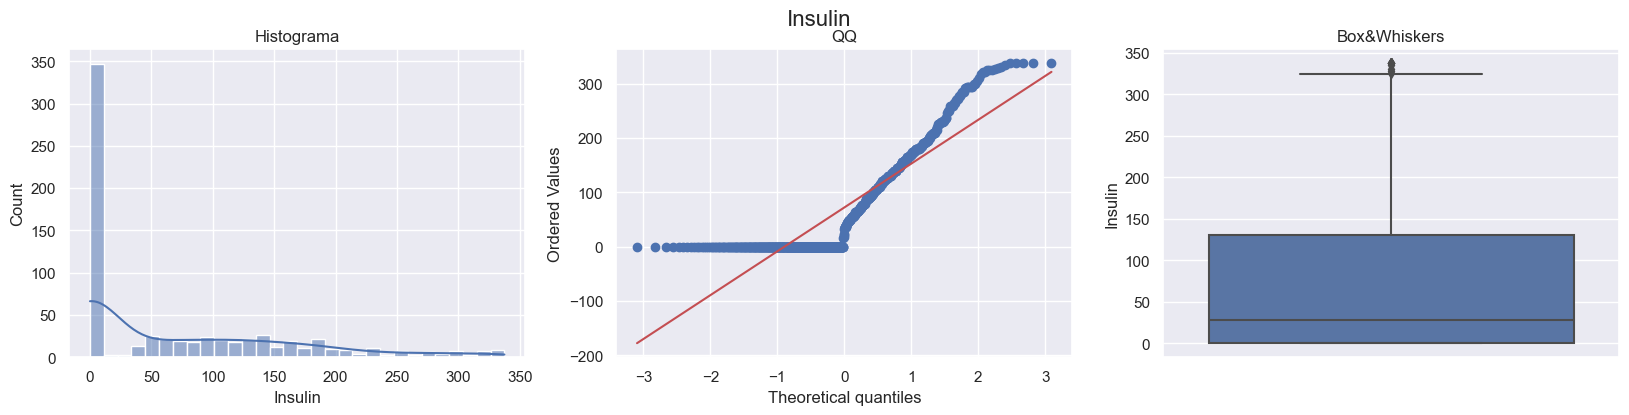

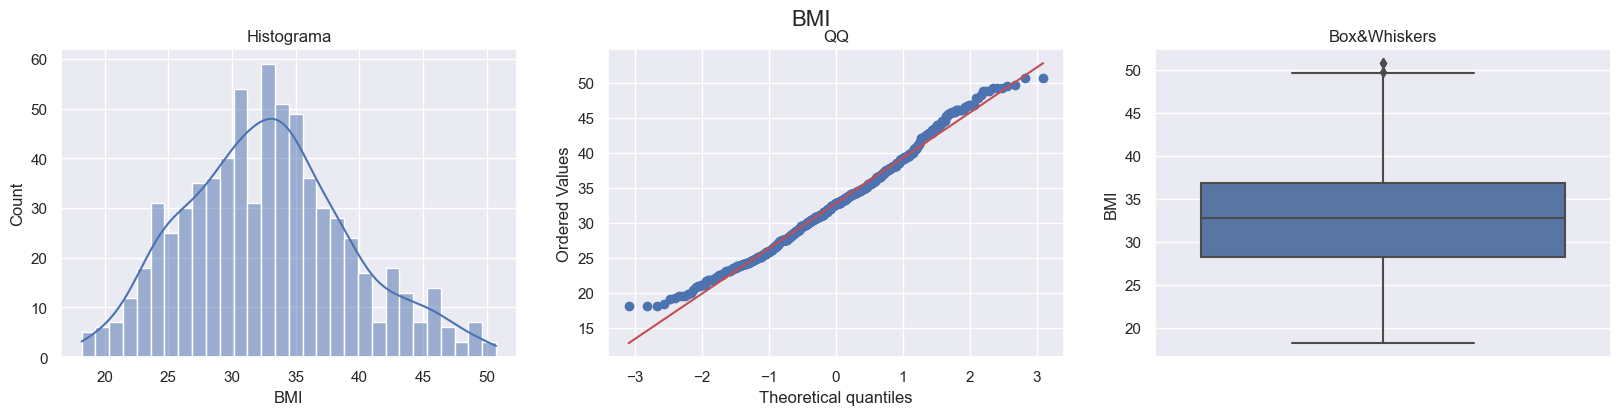

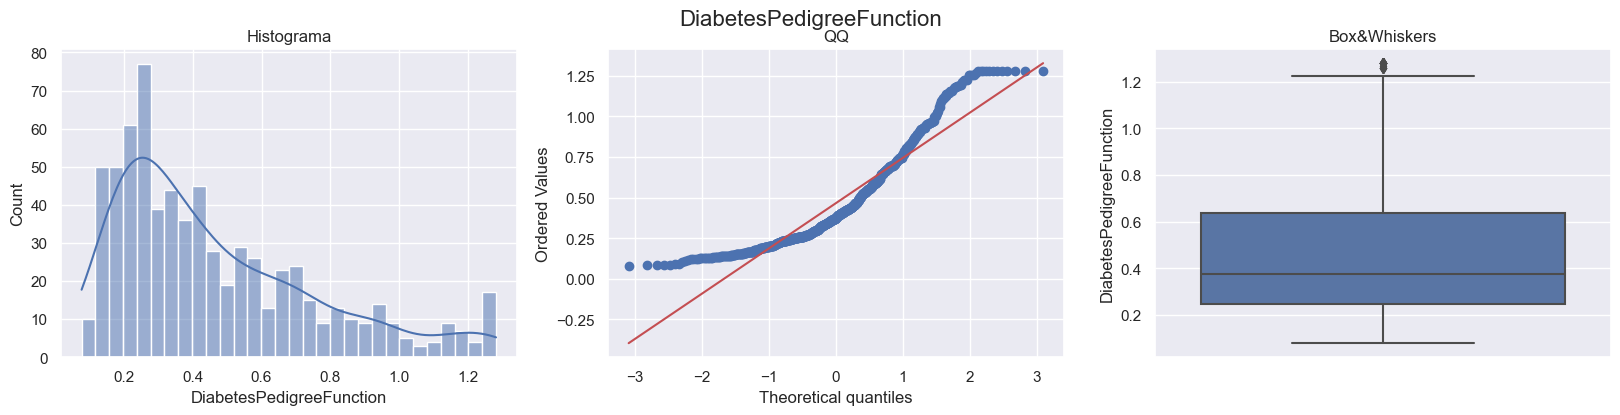

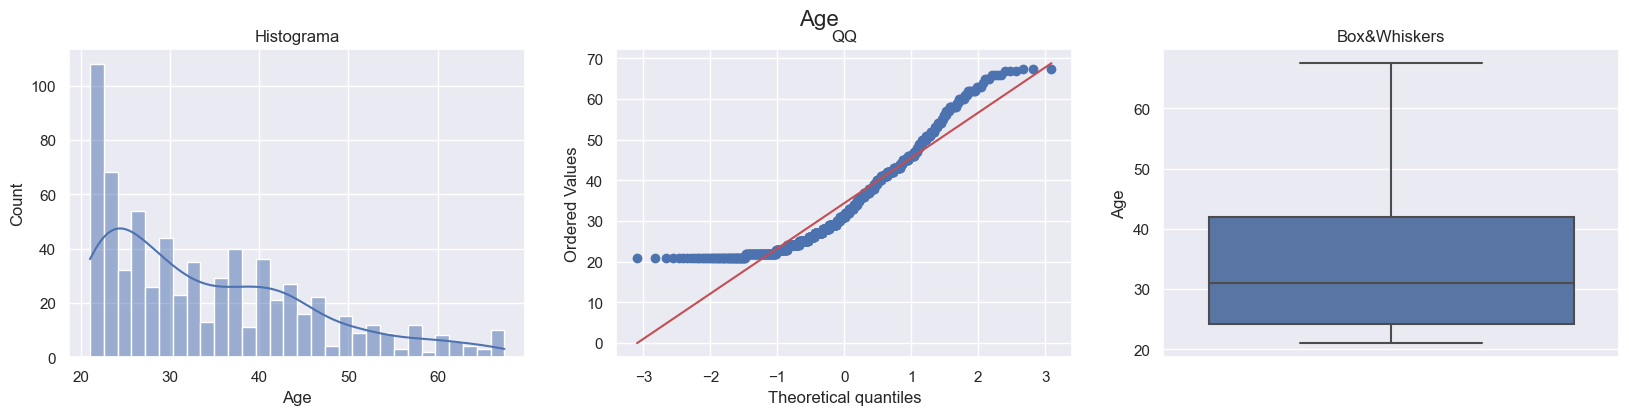

In [18]:
X_train_trimmed = transform_outliers(X_train, norm_col)

for col in norm_col:
    outlier_diagnostic_plots(X_train_trimmed, col)
    
X_train = X_train_trimmed

No se observan fuertes correlaciones entre las features y la salida

## Modelos y evaluación


In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

In [20]:
y_train = X_train['Outcome']

X = X_train.drop(['Outcome'], axis=1)
y = y_train    
print(len(y_train))
print(len(X_train))
print(len(y))
print(len(X))

702
702
702
702


In [21]:
X = X_train.drop(['Outcome'], axis=1)
y = y_train               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y_train)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size= 0.1, shuffle=True, stratify=y_train)

print("Train:", len(X_train))
print("Tests:", len(X_test))
print("Validation:", len(X_val))

Train: 504
Tests: 141
Validation: 57


In [22]:
def evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, Scale=False, Model='logistic'):
    if Scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)

    if Model == 'logistic':
        model = LogisticRegression(max_iter=1000)
    elif Model == 'logistic_cv':
        model = LogisticRegressionCV(max_iter=1000)
    elif Model == 'random_forest':
        model = RandomForestClassifier()
    elif Model == 'gradient_boosting':
        model = GradientBoostingClassifier()
    elif Model == 'svm':
        model = SVC()
    elif Model == 'knn':  
        model = KNeighborsClassifier()
    elif Model == 'decision_tree_classifier':  
        model = DecisionTreeClassifier()
    else:
        raise ValueError("Model type not recognized")

    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)

    #sns.histplot(data=y_pred_val)

    accuracy_val = accuracy_score(y_pred_val, y_val)
    precision_val = precision_score(y_pred_val, y_val)
    recall_val = recall_score(y_pred_val, y_val)
    f1_val = f1_score(y_pred_val, y_val)

    metrics_val_df = pd.DataFrame({
        'Modelo': [Model],
        'Scale': [Scale],
        'Accuracy': [accuracy_val],
        'Precision': [precision_val],
        'Recall': [recall_val],
        'F1': [f1_val]
    })

    accuracy_test = accuracy_score(y_pred_test, y_test)

    return metrics_val_df


In [23]:
df_result = pd.DataFrame()

df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, Scale=True, Model='logistic')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, Scale=True, Model='logistic_cv')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, Scale=True, Model='random_forest')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, Scale=True, Model='gradient_boosting')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, Scale=True, Model='svm')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, Scale=True, Model='knn')], ignore_index=True)
df_result = pd.concat([df_result, evaluate_classification_model(X_train, y_train, X_val, y_val, X_test, y_test, Scale=True, Model='decision_tree_classifier')], ignore_index=True)

print(df_result)

                     Modelo  Scale  Accuracy  Precision    Recall        F1
0                  logistic   True  0.771930   0.750000  0.777778  0.763636
1               logistic_cv   True  0.789474   0.785714  0.785714  0.785714
2             random_forest   True  0.842105   0.928571  0.787879  0.852459
3         gradient_boosting   True  0.842105   0.928571  0.787879  0.852459
4                       svm   True  0.771930   0.928571  0.702703  0.800000
5                       knn   True  0.701754   0.714286  0.689655  0.701754
6  decision_tree_classifier   True  0.771930   0.821429  0.741935  0.779661


## Neural Network

In [59]:

import torch
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [62]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)


C:\Users\cbureu\AppData\Local\Temp\ipykernel_11484\2348192684.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\cbureu\AppData\Local\Temp\ipykernel_11484\2348192684.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
C:\Users\cbureu\AppData\Local\Temp\ipykernel_11484\2348192684.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32)
C:\Users\cbureu\AppData\Local\Temp\ipykernel_1148

In [63]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class FeedForward(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedForward, self).__init__()  
        self.fc1 = nn.Linear(input_dim, hidden_dim)  
        self.relu = nn.ReLU()  
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
        self.sigmoid = nn.Sigmoid()  

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

input_dim = 7  
hidden_dim = 32 
output_dim = 1  

net = FeedForward(input_dim, hidden_dim, output_dim)

criterion = nn.BCELoss()
#criterion = nn.ReLU()

optimizer = optim.SGD(net.parameters(), lr=0.2)

# Training loop
for epoch in range(8000):
    values = np.random.permutation(X_train.shape[0])
    val_values = np.random.permutation(X_val.shape[0])

    subsetX = X_train[values[:22], :7]
    subsety = y_train[values[:22]]
    subsetvalX = X_val[val_values[:22], :7]
    subsetvaly = y_val[val_values[:22]]

    optimizer.zero_grad()
    outputs = net(subsetX)

    # Calculate the loss
    loss = criterion(outputs, subsety.float().view(-1, 1))  # BCELoss expects float input and a column vector for targets

    # Backpropagation
    loss.backward()

    # Update the model parameters
    optimizer.step()

    # # Medimos el error de validacion
    outputs_val = net(subsetvalX)
    loss_val = criterion(outputs_val, subsetvaly.reshape([-1, 1]))
    
    errors.append(loss.item())
    errors_val.append(loss_val.item())
    


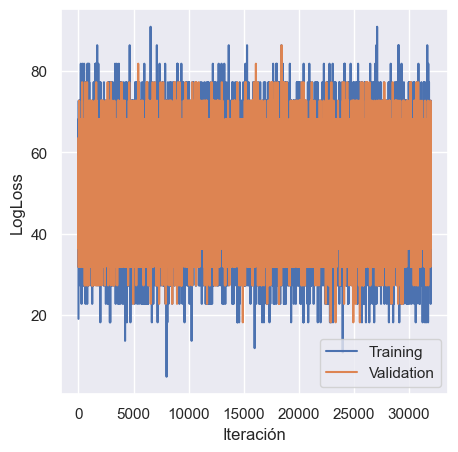

In [64]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(errors, label="Training")
ax.plot(errors_val, label="Validation")
ax.set_ylabel("LogLoss")
ax.set_xlabel("Iteración")
ax.legend()
plt.show();

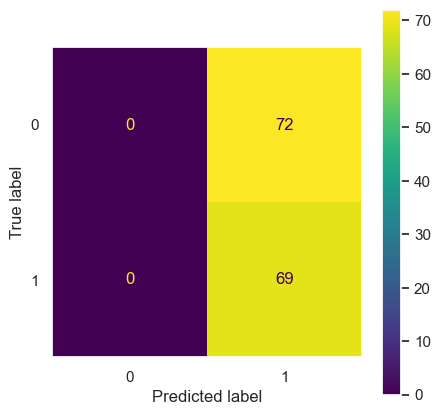

In [65]:
X_test_subset = X_test[:, :7]  # Select the first 7 features
y_prob = net(X_test_subset).detach().numpy().reshape(-1)
threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
disp.plot(ax=ax);

In [66]:
print(f"El porcentaje de exactitud es de:{accuracy_score(y_test, y_pred)*100: .0f}%")
print(f"F1-score de testeo fue: {f1_score(y_test, y_pred)}")

El porcentaje de exactitud es de: 49%
F1-score de testeo fue: 0.6571428571428571


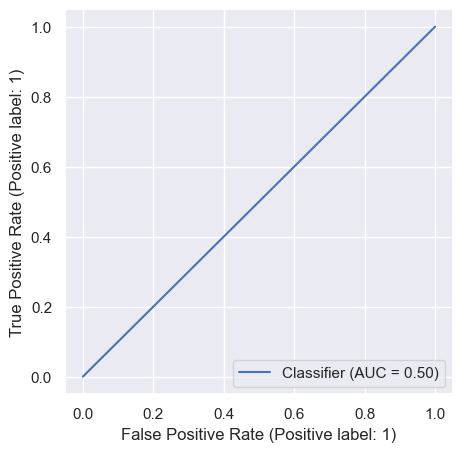

In [67]:
fig, ax = plt.subplots(figsize=(5,5))
svc_disp = RocCurveDisplay.from_predictions(y_test, y_pred, ax=ax)

plt.show();